In [24]:
import json
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk.data
from nltk.tokenize import word_tokenize,sent_tokenize
from pycorenlp import StanfordCoreNLP
from itertools import groupby

# from nltk.tag.stanford import NERTagger
from nltk.tag import StanfordNERTagger
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
%matplotlib inline

In [9]:
def read_data(json_file='../data/book_summary2.json'):
    with open(json_file,'r') as f:
        return json.load(f)
    
books = read_data()

In [10]:
def word_count(text):
    return len(re.findall(r'\w+', text))

def character_count(book):
    return len(book['characters'])

def data_summary(books):
    print("There are {} books. ".format(len(books)))
    print("Average length of the summary is . ".format(len(books)))

def choose_k(input_list,k):
    n = len(input_list)
    def choose_range(n, k):
        if k == n:
            return [input_list]
        elif k == 0:
            return [[]]
        elif k == 1:
            return [[(i,input_list[i])] for i in xrange(len(input_list))]
        result = []
        for lst in choose_range(n-1, k-1):
            result.extend(lst + [(i,input_list[i])] for i in range(lst[-1][0] + 1, n))
        return result
    res = choose_range(n,k)
    return [[x[1] for x in items] for items in res]
    

In [11]:
def get_text_between_character(book):
    sentences = sentence_tokenizer.tokenize(book['summary'])
    pairs = choose_k(book['characters'],2)
    res = []
    for sentence in sentences:
        words = word_count_
        for pair in pairs:
            if pair[0] in 
    

SyntaxError: invalid syntax (<ipython-input-11-00095c774d6b>, line 8)

In [12]:
word_count_all = [word_count(books[i]['summary']) for i in xrange(len(books))]
character_count = [character_count(books[i]) for i in xrange(len(books))]


(array([  19.,  116.,  301.,  104.,   26.,    9.,    5.,    1.,    1.,    2.]),
 array([    0. ,   355.2,   710.4,  1065.6,  1420.8,  1776. ,  2131.2,
         2486.4,  2841.6,  3196.8,  3552. ]),
 <a list of 10 Patch objects>)

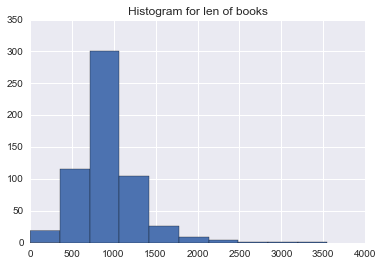

In [13]:
plt.title('Histogram for len of books')
plt.hist(word_count_all)

(array([  71.,  180.,  212.,   69.,   29.,    9.,    7.,    5.,    1.,    1.]),
 array([  0. ,   7.5,  15. ,  22.5,  30. ,  37.5,  45. ,  52.5,  60. ,
         67.5,  75. ]),
 <a list of 10 Patch objects>)

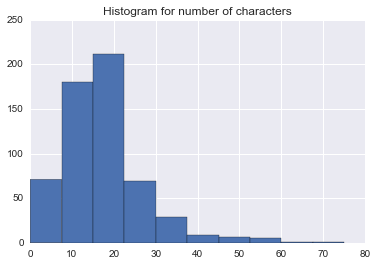

In [14]:
plt.title('Histogram for number of characters')
plt.hist(character_count)

In [15]:
def choose_k(input_list,k):
    n = len(input_list)
    def choose_range(n, k):
        if k == n:
            return [input_list]
        elif k == 0:
            return [[]]
        elif k == 1:
            return [[(i,input_list[i])] for i in xrange(len(input_list))]
        result = []
        for lst in choose_range(n-1, k-1):
            result.extend(lst + [(i,input_list[i])] for i in range(lst[-1][0] + 1, n))
        return result
    res = choose_range(n,k)
    return [[x[1] for x in items] for items in res]

choose_k(['a','b','c','d','e'],3)

[['a', 'b', 'c'],
 ['a', 'b', 'd'],
 ['a', 'b', 'e'],
 ['a', 'c', 'd'],
 ['a', 'c', 'e'],
 ['a', 'd', 'e'],
 ['b', 'c', 'd'],
 ['b', 'c', 'e'],
 ['b', 'd', 'e'],
 ['c', 'd', 'e']]

In [16]:
book = books[0]
pairs = choose_k([ch[0] for ch in book['characters']],2)
text = book['summary']

In [17]:
pairs

[[u'Winston Smith', u'Julia'],
 [u'Winston Smith', u'O\u2019Brien'],
 [u'Winston Smith', u'Big Brother'],
 [u'Winston Smith', u'Mr. Charrington'],
 [u'Winston Smith', u'Syme'],
 [u'Winston Smith', u'Parsons'],
 [u'Winston Smith', u'Emmanuel Goldstein'],
 [u'Julia', u'O\u2019Brien'],
 [u'Julia', u'Big Brother'],
 [u'Julia', u'Mr. Charrington'],
 [u'Julia', u'Syme'],
 [u'Julia', u'Parsons'],
 [u'Julia', u'Emmanuel Goldstein'],
 [u'O\u2019Brien', u'Big Brother'],
 [u'O\u2019Brien', u'Mr. Charrington'],
 [u'O\u2019Brien', u'Syme'],
 [u'O\u2019Brien', u'Parsons'],
 [u'O\u2019Brien', u'Emmanuel Goldstein'],
 [u'Big Brother', u'Mr. Charrington'],
 [u'Big Brother', u'Syme'],
 [u'Big Brother', u'Parsons'],
 [u'Big Brother', u'Emmanuel Goldstein'],
 [u'Mr. Charrington', u'Syme'],
 [u'Mr. Charrington', u'Parsons'],
 [u'Mr. Charrington', u'Emmanuel Goldstein'],
 [u'Syme', u'Parsons'],
 [u'Syme', u'Emmanuel Goldstein'],
 [u'Parsons', u'Emmanuel Goldstein']]

In [18]:
text  #Mr.Potter Mrs.Potter

u'Winston Smith is a low-rankingmember of the ruling Party in London, in the nationof Oceania. Everywhere Winston goes, even his own home, the Partywatches him through telescreens; everywhere he looks he sees theface of the Party\u2019s seemingly omniscient leader, a figure knownonly as Big Brother. The Party controls everything in Oceania, eventhe people\u2019s history and language. Currently, the Party is forcingthe implementation of an invented language called Newspeak, whichattempts to prevent political rebellion by eliminating all wordsrelated to it. Even thinking rebellious thoughts is illegal. Suchthoughtcrime is, in fact, the worst of all crimes.\nAs the novel opens, Winston feels frustrated by the oppression andrigid control of the Party, which prohibits free thought, sex, and anyexpression of individuality. Winston dislikes the party and has illegallypurchased a diary in which to write his criminal thoughts. He hasalso become fixated on a powerful Party member named O\xe2\x80

In [1]:
from nltk.tag import StanfordNERTagger

# st = StanfordNERTagger('/Users/codehi/tools/StanfordParser/stanford-ner-2016-10-31/classifiers/english.all.3class.distsim.crf.ser.gz',
#                '/Users/codehi/tools/StanfordParser/stanford-ner-2016-10-31/stanford-ner.jar') 

st = StanfordNERTagger('english.all.3class.distsim.crf.ser.gz')#
#r'/Users/codehi/Projects/Galvanize/Capstone/tools/stanford-english-corenlp-2016-10-31-models.jar') 
# st = POSTagger(r'english-bidirectional-distim.tagger',r'/Users/codehi/Projects/Galvanize/Capstone/tools/stanford-english-corenlp-2016-10-31-models.jar')


In [ ]:
netagged_words = st.tag('Rami Eid is studying at Stony Brook University in New York'.split()) 
for tag, chunk in groupby(netagged_words, lambda x:x[1]):
    if tag != "O":
        print("%-12s"%tag, " ".join(w for w, t in chunk))

In [33]:
netagged_words

[(u'Rami', u'PERSON'),
 (u'Eid', u'PERSON'),
 (u'is', u'O'),
 (u'studying', u'O'),
 (u'at', u'O'),
 (u'Stony', u'ORGANIZATION'),
 (u'Brook', u'ORGANIZATION'),
 (u'University', u'ORGANIZATION'),
 (u'in', u'O'),
 (u'New', u'LOCATION'),
 (u'York', u'LOCATION')]

In [37]:
import spacy
nlp = spacy.load('en')
doc = nlp(u'They told us to duck.')
for word in doc:
    print(word.text, word.lemma, word.lemma_, word.tag, word.tag_, word.pos, word.pos_)

(u'They', 500, u'they', 445, u'PRP', 92, u'PRON')
(u'told', 750, u'tell', 455, u'VBD', 97, u'VERB')
(u'us', 694, u'us', 445, u'PRP', 92, u'PRON')
(u'to', 468, u'to', 452, u'TO', 91, u'PART')
(u'duck', 5792, u'duck', 454, u'VB', 97, u'VERB')
(u'.', 419, u'.', 419, u'.', 94, u'PUNCT')


In [56]:
doc = nlp(u'Rami Eid is studying at Stony Brook University in New York.')
for ent in doc.ents:
    print(ent.label_, ent.text)

(u'PERSON', u'Rami Eid')
(u'ORG', u'Stony Brook University')
(u'GPE', u'New York')


In [59]:
for word in doc:
    print(word.text,  word.lemma_, word.tag_, word.pos_)

(u'Rami', u'rami', u'NNP', u'PROPN')
(u'Eid', u'eid', u'NNP', u'PROPN')
(u'is', u'be', u'VBZ', u'VERB')
(u'studying', u'study', u'VBG', u'VERB')
(u'at', u'at', u'IN', u'ADP')
(u'Stony', u'stony', u'NNP', u'PROPN')
(u'Brook', u'brook', u'NNP', u'PROPN')
(u'University', u'university', u'NNP', u'PROPN')
(u'in', u'in', u'IN', u'ADP')
(u'New', u'new', u'NNP', u'PROPN')
(u'York', u'york', u'NNP', u'PROPN')
(u'.', u'.', u'.', u'PUNCT')


In [51]:
list(doc.noun_chunks)

[Rami Eid, Stony Brook University, New York]

In [55]:
for sent in sent_tokenize(text):
    doc = nlp(sent)
    for ent in doc.ents:
        if ent.label_ == 'PERSON':
            print(ent.text)
    print 

Winston Smith

Winston





Winston

Winston


Winston


Eurasia
Winston

Partyalso
Emmanuel Goldstein
Winston

Winston

Winston
Julia

Winston


Winston
Winston
Julia

Winston’s
Julia


Winston
Julia
O’Brien’s
Winston
Winston

Winston
Julia

Winston
Julia
Winston
Emmanuel Goldstein

Winston


Charrington

Julia
Winston
Winston

Winston

Winston
Winston
Winston’s

Julia

Julia
O’Brien
Winston

Winston
Julia




In [62]:
from pycorenlp import StanfordCoreNLP
nlp = StanfordCoreNLP('http://localhost:9000')

In [65]:
res = nlp.annotate("I love you. I hate him. You are nice. He is dumb",
                   properties={
                       'annotators': 'sentiment',
                       'outputFormat': 'json',
                       'timeout': 1000,
                   })
res

{u'sentences': [{u'basicDependencies': [{u'dep': u'ROOT',
     u'dependent': 2,
     u'dependentGloss': u'love',
     u'governor': 0,
     u'governorGloss': u'ROOT'},
    {u'dep': u'nsubj',
     u'dependent': 1,
     u'dependentGloss': u'I',
     u'governor': 2,
     u'governorGloss': u'love'},
    {u'dep': u'dobj',
     u'dependent': 3,
     u'dependentGloss': u'you',
     u'governor': 2,
     u'governorGloss': u'love'},
    {u'dep': u'punct',
     u'dependent': 4,
     u'dependentGloss': u'.',
     u'governor': 2,
     u'governorGloss': u'love'}],
   u'enhancedDependencies': [{u'dep': u'ROOT',
     u'dependent': 2,
     u'dependentGloss': u'love',
     u'governor': 0,
     u'governorGloss': u'ROOT'},
    {u'dep': u'nsubj',
     u'dependent': 1,
     u'dependentGloss': u'I',
     u'governor': 2,
     u'governorGloss': u'love'},
    {u'dep': u'dobj',
     u'dependent': 3,
     u'dependentGloss': u'you',
     u'governor': 2,
     u'governorGloss': u'love'},
    {u'dep': u'punct',
     u

In [69]:
! ../tools/book-nlp/runjava novels/BookNLP -doc /Users/codehi/Projects/Galvanize/Capstone/data/summary-text/1.1984.txt -printHTML -p  /Users/codehi/Projects/Galvanize/Capstone/data/summary-tag -tok  /Users/codehi/Projects/Galvanize/Capstone/data/summary-tokens/1984.tokens -f

Adding annotator tokenize
Adding annotator ssplit
Adding annotator pos
Reading POS tagger model from edu/stanford/nlp/models/pos-tagger/english-left3words/english-left3words-distsim.tagger ... done [2.0 sec].
Adding annotator lemma
Adding annotator ner
Loading classifier from edu/stanford/nlp/models/ner/english.all.3class.distsim.crf.ser.gz ... done [6.4 sec].
Loading classifier from edu/stanford/nlp/models/ner/english.muc.7class.distsim.crf.ser.gz ... done [5.2 sec].
Loading classifier from edu/stanford/nlp/models/ner/english.conll.4class.distsim.crf.ser.gz ... done [4.3 sec].
Reading TokensRegex rules from edu/stanford/nlp/models/sutime/defs.sutime.txt
Reading TokensRegex rules from edu/stanford/nlp/models/sutime/english.sutime.txt
Mar 21, 2017 2:57:42 PM edu.stanford.nlp.ling.tokensregex.CoreMapExpressionExtractor appendRules
INFO: Ignoring inactive rule: null
Mar 21, 2017 2:57:42 PM edu.stanford.nlp.ling.tokensregex.CoreMapExpressionExtractor appendRules
INFO: Ignoring inactive rul

In [2]:
import re

In [10]:
search_go_to = set(["go", "to"])
m = ' .*? '.join(x for x in search_go_to)
words = set(["I go over to", "go up to", "foo bar"])
matches = [s for s in words if re.search(m, s)]
print(matches)


['I go over to', 'go up to']
